C:\Users\Sander\AppData\Local\Temp\ipykernel_21388\2102486967.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rosenborg_team_id['corrected_x_rosenborg'] = 105 - rosenborg_team_id['x']
C:\Users\Sander\AppData\Local\Temp\ipykernel_21388\2102486967.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rosenborg_team_id['corrected_y_rosenborg'] = 68 - rosenborg_team_id['y']


Text(0.5, 1.0, 'Rosenborg Shots')

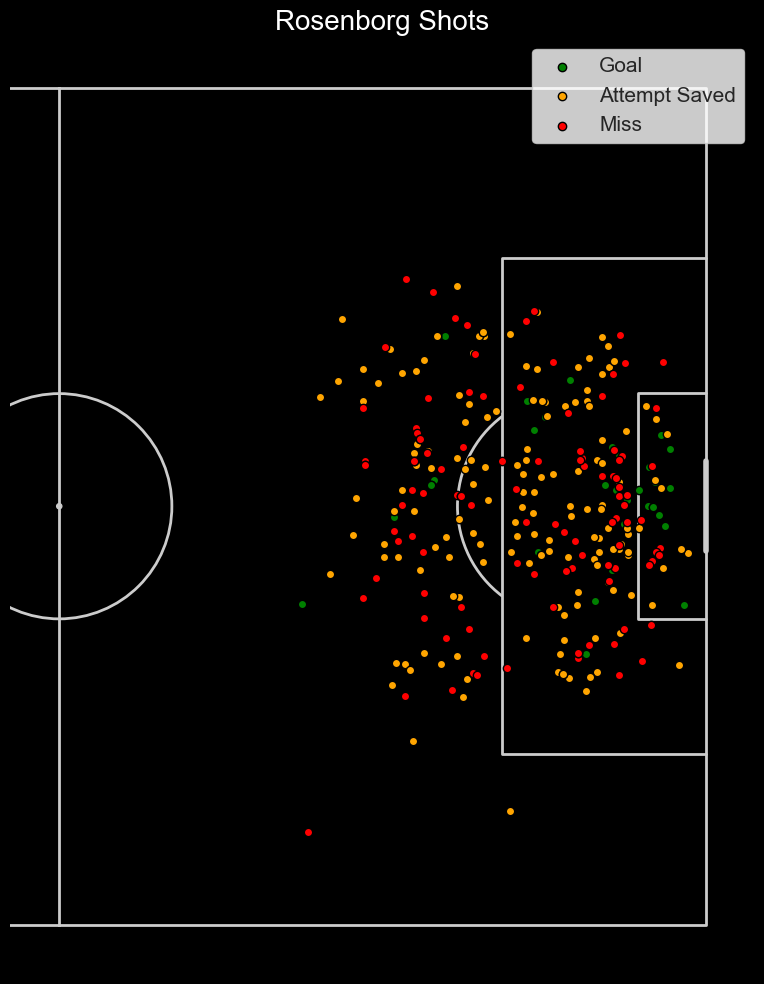

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import requests
from matplotlib import font_manager
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import seaborn as sns
import json



url = "https://www.fotmob.com/teams/8422/fixtures/rosenborg?before=4385414"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"}


response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
match_urls = [a['href'] for a in soup.find_all('a', href=True) if '/matches/' in a['href']]
match_ids = [url.split('#')[-1] for url in match_urls]


def scraper(match_id):
    params = {
    'matchId': match_id,
    }
    response = requests.get('https://www.fotmob.com/api/matchDetails', params=params, headers=headers)
    data = response.json()
    content = data.get('content', [])
    shotmap = content['shotmap']['Periods']['All']
    return pd.DataFrame(shotmap)


# all_shots_rosenborg = pd.concat([scraper(match_id) for match_id in match_ids])

'''' 1. FILTER OUT ALL ROSENBORG SHOTS BY TEAMID.
     2. CORRECTING COORDINATES
     3. FILTERS ROSENBORG SHOTS BY GOAL, ATTEMPT SAVED AND MISS (SO WE CAN COLOR EACH DOT WITH A UNIQUE COLOR)'''
rosenborg_team_id = all_shots_rosenborg[all_shots_rosenborg['teamId'] == 8422]
rosenborg_team_id['corrected_x_rosenborg'] = 105 - rosenborg_team_id['x']
rosenborg_team_id['corrected_y_rosenborg'] = 68 - rosenborg_team_id['y']
rosenborg_shots_goal = rosenborg_team_id[rosenborg_team_id['eventType'] == 'Goal']
rosenborg_shots_attempt_saved = rosenborg_team_id[rosenborg_team_id['eventType'] == 'AttemptSaved']
rosenborg_shots_miss = rosenborg_team_id[rosenborg_team_id['eventType'] == 'Miss']
total_shots = len(rosenborg_shots_goal) + len(rosenborg_shots_attempt_saved) + len(rosenborg_shots_miss)

''' PITCH LENGTH AND WIDTH'''
pitch_length = 105
pitch_width = 68



''' PITCH '''
pitch = Pitch(half=True, pitch_type='custom', pitch_length=pitch_length, pitch_width=pitch_width)
fig, ax = pitch.draw(figsize=(16, 10))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
''' PLOTTING SHOTS'''
# ax.scatter(rosenborg_shots_goal['corrected_x_rosenborg'], rosenborg_shots_goal['corrected_y_rosenborg'], color='green', edgecolors='black', zorder=12, label='Goal')
# ax.scatter(rosenborg_shots_attempt_saved['corrected_x_rosenborg'], rosenborg_shots_attempt_saved['corrected_y_rosenborg'], color='orange', edgecolors='black', zorder=12, label='Attempt Saved')
# ax.scatter(rosenborg_shots_miss['corrected_x_rosenborg'], rosenborg_shots_miss['corrected_y_rosenborg'], color='red', edgecolors='black', zorder=12, label='Miss')
ax.scatter(rosenborg_shots_goal['x'], rosenborg_shots_goal['y'], color='green', edgecolors='black', zorder=12, label='Goal')
ax.scatter(rosenborg_shots_attempt_saved['x'], rosenborg_shots_attempt_saved['y'], color='orange', edgecolors='black', zorder=12, label='Attempt Saved')
ax.scatter(rosenborg_shots_miss['x'], rosenborg_shots_miss['y'], color='red', edgecolors='black', zorder=12, label='Miss')
ax.legend(loc='upper right', fontsize=15)
ax.set_title('Rosenborg Shots', fontsize=20, color='white')

# heatmap = sns.kdeplot(x='corrected_x_rosenborg', y='corrected_y_rosenborg', data=rosenborg_shots_goal, cmap='viridis', levels=100, alpha=0.3)
# cbar = plt.colorbar(heatmap.collections[0], ax=heatmap, orientation='vertical')

